In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # 1
from sklearn.metrics import confusion_matrix,roc_curve,auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # 2
from sklearn.linear_model import LogisticRegression# 3
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
df = pd.read_csv(r'prepForMLearning.csv', index_col=0)

In [4]:
df.head(3)

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,48


In [5]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   education        4240 non-null   int64  
 1   currentSmoker    4240 non-null   int64  
 2   cigsPerDay       4240 non-null   float64
 3   BPMeds           4240 non-null   int64  
 4   prevalentStroke  4240 non-null   int64  
 5   prevalentHyp     4240 non-null   int64  
 6   diabetes         4240 non-null   int64  
 7   totChol          4240 non-null   float64
 8   sysBP            4240 non-null   float64
 9   diaBP            4240 non-null   float64
 10  BMI              4240 non-null   float64
 11  heartRate        4240 non-null   float64
 12  glucose          4240 non-null   float64
 13  TenYearCHD       4240 non-null   int64  
 14  gender           4240 non-null   int64  
 15  age              4240 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 563.1 KB


# Creating `X-input` and `y-output`

In [6]:
df.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,61
4,3,1,23.0,0,0,0,0,262.0,130.0,84.0,23.10,85.0,85.0,0,0,46


In [7]:
X  = df.drop(columns=['TenYearCHD'], axis=0)
y = df.TenYearCHD

In [8]:
X.head()

,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender,age
0,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,1,39
1,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46
2,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,48
3,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0,61
4,3,1,23.0,0,0,0,0,262.0,130.0,84.0,23.10,85.0,85.0,0,46


# Spliting our data into Training and Testing 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.20, random_state=42)
# train_test_split()

In [11]:
# Checking the shape of the `X_train`,`X_test`, `y_train` and `y_test`

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (3392, 15)
X_test shape:  (848, 15)
y_train shape:  (3392,)
y_test shape:  (848,)


# TRAINING THE MACHINE LEARNING MODEL

In [12]:
# DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier()

In [13]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

# MODEL EVALUATION

In [14]:
dtc.score(X_test, y_test)

0.75

In [15]:
# Predicting with the model
# Predictions are stored in y_pred
y_pred = dtc.predict(X_test)

In [16]:
# Comparing model predicted values and actual values

print('array:',y_test[:25].to_list())
y_pred[:25]

array: [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

# PLEASE USE THIS METHOD YOU'LL ALWAYS MEET IT

In [17]:
# Training Accuracy

dtc.score(X_train,y_train)

1.0

In [18]:


accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

<Axes: xlabel='TenYearCHD'>

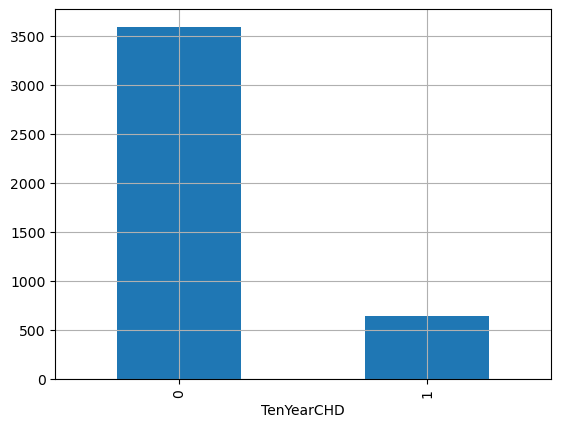

In [19]:
df.TenYearCHD.value_counts().plot(kind='bar', grid=True)